<a href="https://colab.research.google.com/github/ce3tnia/DataMining/blob/master/MIDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explore Dataset**

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/MachineLearning/chronic_kidney_disease.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.shape

(400, 26)

# **Preprocessing**

In [ ]:
df.drop("id",axis=1,inplace=True) 

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

age : 76 values
bp : 10 values
sg : 5 values
al : 6 values
su : 6 values
rbc : 2 values
pc : 2 values
pcc : 2 values
ba : 2 values
bgr : 146 values
bu : 118 values
sc : 84 values
sod : 34 values
pot : 40 values
hemo : 115 values
pcv : 44 values
wc : 92 values
rc : 49 values
htn : 2 values
dm : 5 values
cad : 3 values
appet : 2 values
pe : 2 values
ane : 2 values
classification : 3 values


In [ ]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

Categorical features:  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [ ]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

sg has [1.02  1.01  1.005 1.015   nan 1.025] categories.

al has [ 1.  4.  2.  3.  0. nan  5.] categories.

su has [ 0.  3.  4.  1. nan  2.  5.] categories.

rbc has [nan 'normal' 'abnormal'] categories.

pc has ['normal' 'abnormal' nan] categories.

pcc has ['notpresent' 'present' nan] categories.

ba has ['notpresent' 'present' nan] categories.

htn has ['yes' 'no' nan] categories.

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

cad has ['no' 'yes' '\tno' nan] categories.

appet has ['good' 'poor' nan] categories.

pe has ['no' 'yes' nan] categories.

ane has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



In [ ]:
#memperbaiki nilai unique
df.wc=df.wc.replace("\t6200",6200)
df.wc=df.wc.replace("\t8400",8400) 
df['dm'] = df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')
print(df.loc[11,["wc"]])
print(df.loc[20,["wc"]])

wc    4500
Name: 11, dtype: object
wc    9200
Name: 20, dtype: object


In [ ]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

Categorical features:  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [ ]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

sg has [1.02  1.01  1.005 1.015   nan 1.025] categories.

al has [ 1.  4.  2.  3.  0. nan  5.] categories.

su has [ 0.  3.  4.  1. nan  2.  5.] categories.

rbc has [nan 'normal' 'abnormal'] categories.

pc has ['normal' 'abnormal' nan] categories.

pcc has ['notpresent' 'present' nan] categories.

ba has ['notpresent' 'present' nan] categories.

htn has ['yes' 'no' nan] categories.

dm has ['yes' 'no' nan] categories.

cad has ['no' 'yes' nan] categories.

appet has ['good' 'poor' nan] categories.

pe has ['no' 'yes' nan] categories.

ane has ['no' 'yes' nan] categories.

classification has ['ckd' 'notckd'] categories.



In [ ]:
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')

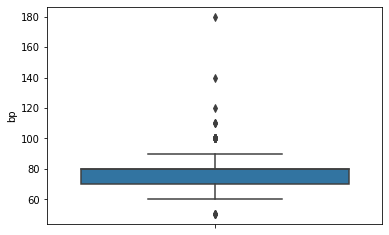

In [ ]:
import seaborn as sns
sns.boxplot(y=df['bp'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

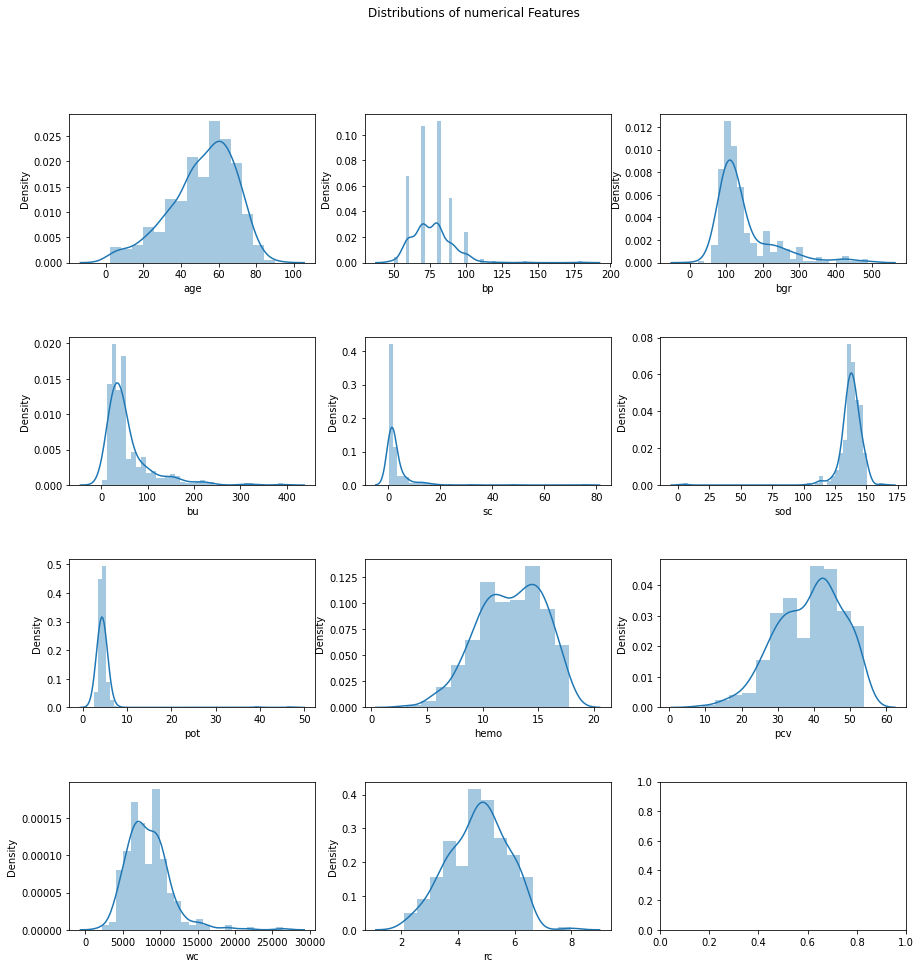

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[feats], ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

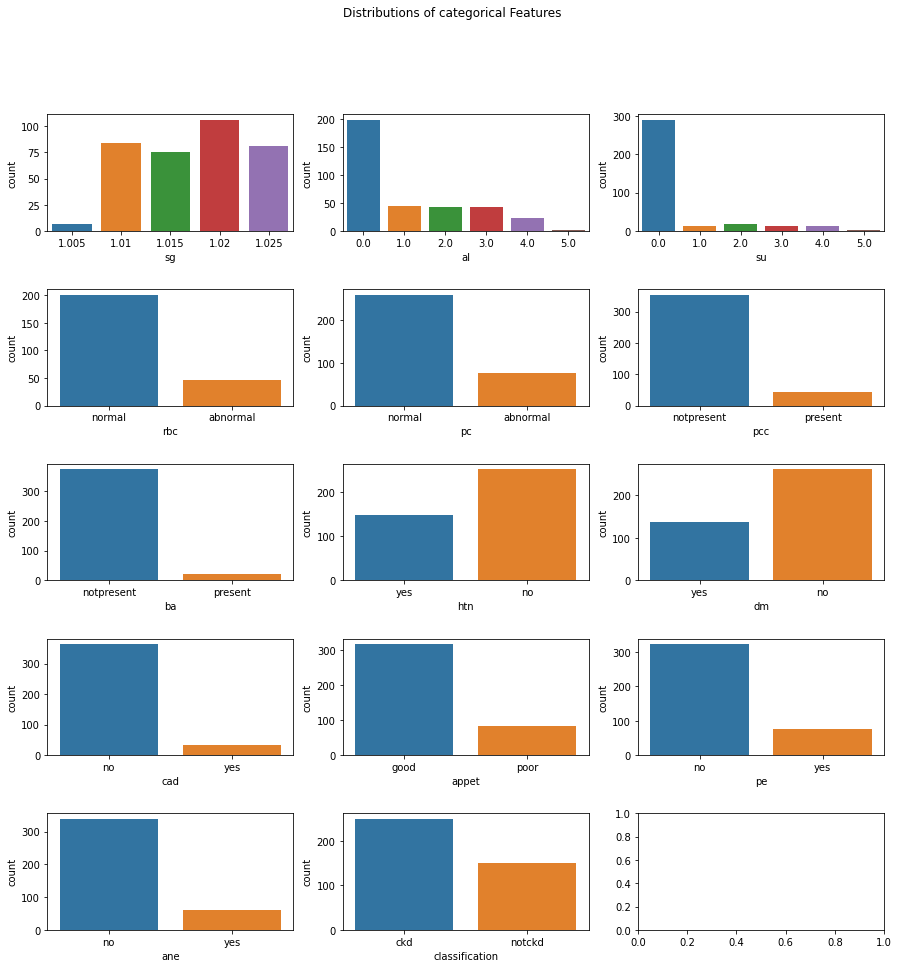

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

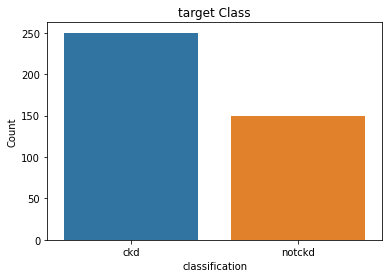

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

In [ ]:
df2=df.dropna(axis=0)
print(df.shape)
print(df2.shape) 
df2.head()

(400, 25)
(158, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd


In [ ]:
df2.index=range(0,len(df2),1)
df2.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    float64
 16  wc              158 non-null    float64
 17  rc              158 non-null    flo

In [ ]:
df2.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
df2['classification'].value_counts()

notckd    115
ckd        43
Name: classification, dtype: int64

In [ ]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [ ]:
#menumerikkan data
df = df2.replace(dictonary)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1,ckd
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,0,0,0,1,ckd
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,0,0,1,0,ckd
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,0,1,0,ckd
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,0,1,1,ckd


In [ ]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

sg has [1.005 1.02  1.01  1.015 1.025] categories.

al has [4. 2. 3. 0. 1.] categories.

su has [0. 2. 4. 1. 3. 5.] categories.

rbc has [0 1] categories.

pc has [1 0] categories.

pcc has [1 0] categories.

ba has [0 1] categories.

htn has [1 0] categories.

dm has [0 1] categories.

cad has [0 1] categories.

appet has [0 1] categories.

pe has [1 0] categories.

ane has [1 0] categories.

classification has ['ckd' 'notckd'] categories.



In [ ]:
category = pd.get_dummies(df.classification)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='classification')
df_baru

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,ckd,notckd
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1,1,0
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,0,0,0,1,1,0
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,0,0,1,0,1,0
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,0,1,0,1,0
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,1,0,0,0,1
154,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,1,0,0,0,1
155,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,1,0,0,0,1
156,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,1,0,0,0,1


In [ ]:
cleanup_nums = {"classification":     {"ckd": 1.0, "notckd": 2.0}}
df.replace(cleanup_nums, inplace=True)
df.head()
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification    float64
dtype: object

In [ ]:
X = df.drop("classification",1)   #Feature Matrix
y = df["classification"]          #Target Variable
df.head()
print(X)
column_name = list(X.columns) 

      age    bp     sg   al   su  rbc  pc  ...   rc  htn  dm  cad  appet  pe  ane
0    48.0  70.0  1.005  4.0  0.0    0   1  ...  3.9    1   0    0      0   1    1
1    53.0  90.0  1.020  2.0  0.0    1   1  ...  3.7    1   1    0      0   0    1
2    63.0  70.0  1.010  3.0  0.0    1   1  ...  3.8    1   1    0      0   1    0
3    68.0  80.0  1.010  3.0  2.0    0   1  ...  2.6    1   1    1      0   1    0
4    61.0  80.0  1.015  2.0  0.0    1   1  ...  3.2    1   1    1      0   1    1
..    ...   ...    ...  ...  ...  ...  ..  ...  ...  ...  ..  ...    ...  ..  ...
153  55.0  80.0  1.020  0.0  0.0    0   0  ...  4.9    0   0    0      1   0    0
154  42.0  70.0  1.025  0.0  0.0    0   0  ...  6.2    0   0    0      1   0    0
155  12.0  80.0  1.020  0.0  0.0    0   0  ...  5.4    0   0    0      1   0    0
156  17.0  60.0  1.025  0.0  0.0    0   0  ...  5.9    0   0    0      1   0    0
157  58.0  80.0  1.025  0.0  0.0    0   0  ...  6.1    0   0    0      1   0    0

[158 rows x 24 

In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,0.113924,0.183544,0.088608,0.075949,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266,1.727848
std,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


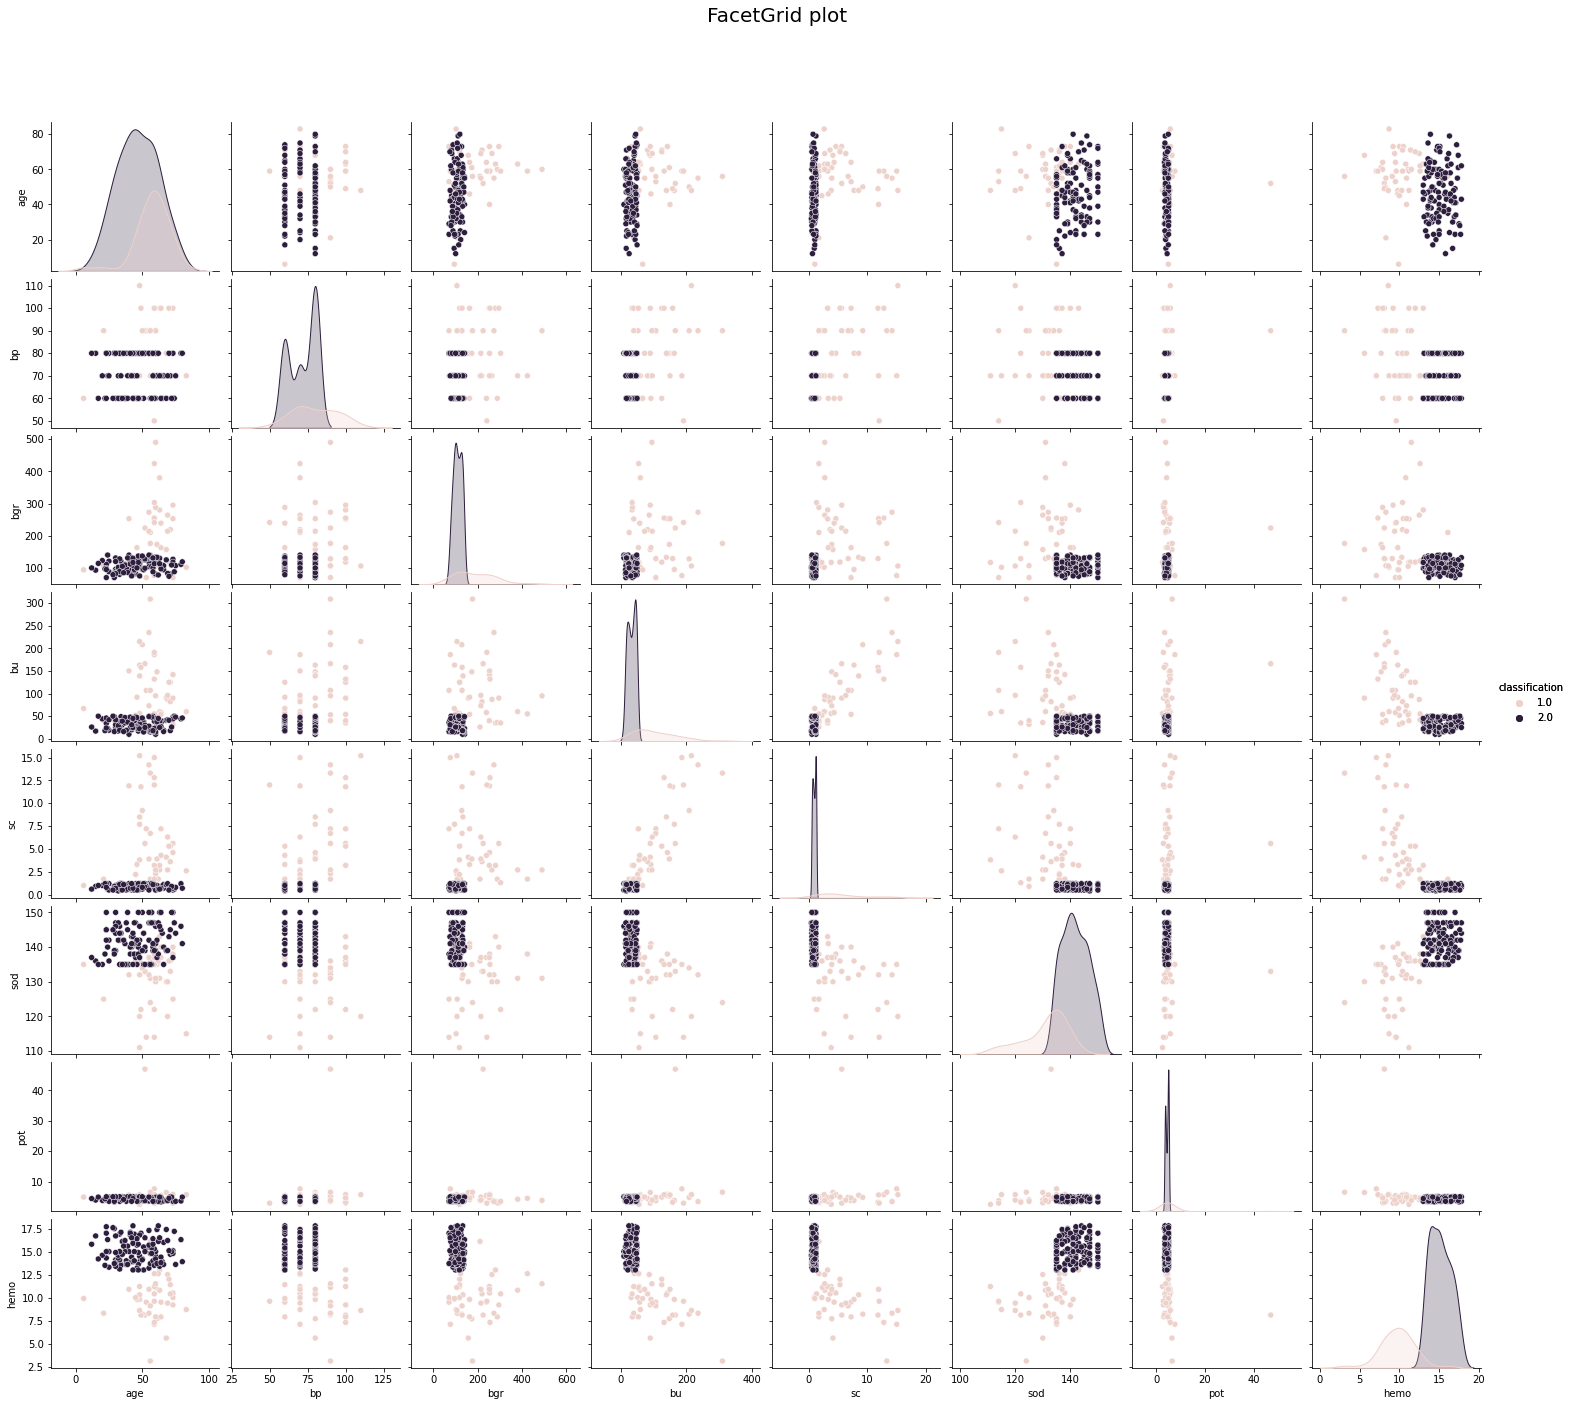

In [ ]:
g = sns.pairplot(df, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)
data_sc = sc.transform(X)

In [ ]:
print(data_sc)

[[-0.10109832 -0.36361289 -2.71336538 ... -2.70477161  2.62678511
   2.97909382]
 [ 0.22225259  1.43172574  0.02309247 ... -2.70477161 -0.38069349
   2.97909382]
 [ 0.8689544  -0.36361289 -1.80121276 ... -2.70477161  2.62678511
  -0.33567254]
 ...
 [-2.42922485  0.53405643  0.02309247 ...  0.36971698 -0.38069349
  -0.33567254]
 [-2.10587394 -1.2612822   0.93524509 ...  0.36971698 -0.38069349
  -0.33567254]
 [ 0.54560349  0.53405643  0.93524509 ...  0.36971698 -0.38069349
  -0.33567254]]


In [ ]:
df = pd.DataFrame(data=data_sc, columns= column_name)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.101098,-0.363613,-2.713365,2.273474,-0.312233,-0.358569,2.109094,3.207135,-0.286691,-0.221549,0.072474,0.525250,-3.730148,-0.616596,-0.865744,-1.092705,-0.569768,-0.976025,1.909727,-0.464095,-0.273551,-2.704772,2.626785,2.979094
1,0.222253,1.431726,0.023092,0.853676,-0.312233,2.788867,2.109094,3.207135,-0.286691,-0.947597,1.151950,1.633514,-3.328309,-0.270309,-1.457446,-1.423236,1.162684,-1.172850,1.909727,2.154729,-0.273551,-2.704772,-0.380693,2.979094
2,0.868954,-0.363613,-1.801213,1.563575,-0.312233,2.788867,2.109094,3.207135,-0.286691,3.841231,0.157139,0.166693,-1.051224,-0.126022,-1.004968,-1.092705,-1.275582,-1.074438,1.909727,2.154729,-0.273551,-2.704772,2.626785,-0.335673
3,1.192305,0.534056,-1.801213,1.563575,2.154410,-0.358569,2.109094,3.207135,3.488075,0.396364,0.792125,0.623038,-1.185170,0.508838,-2.814879,-2.855537,0.809777,-2.255385,1.909727,2.154729,3.655631,-2.704772,2.626785,-0.335673
4,0.739614,0.534056,-0.889060,0.853676,-0.312233,2.788867,2.109094,-0.311805,-0.286691,0.643529,2.019764,0.557846,-0.515439,0.162550,-2.083954,-1.974121,0.232293,-1.664911,1.909727,2.154729,3.655631,-2.704772,2.626785,2.979094


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaler.fit_transform(X)
data_scaled = scaler.transform(X)

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.545455,0.333333,0.00,1.00,0.0,0.0,1.0,1.0,0.0,0.111905,0.153846,0.229730,0.000000,0.000000,0.551020,0.511111,0.128319,0.305085,1.0,0.0,0.0,0.0,1.0,1.0
1,0.610390,0.666667,0.75,0.50,0.0,1.0,1.0,1.0,0.0,0.000000,0.324415,0.459459,0.076923,0.026966,0.435374,0.444444,0.367257,0.271186,1.0,1.0,0.0,0.0,0.0,1.0
2,0.740260,0.333333,0.25,0.75,0.0,1.0,1.0,1.0,0.0,0.738095,0.167224,0.155405,0.512821,0.038202,0.523810,0.511111,0.030973,0.288136,1.0,1.0,0.0,0.0,1.0,0.0
3,0.805195,0.500000,0.25,0.75,0.4,0.0,1.0,1.0,1.0,0.207143,0.267559,0.250000,0.487179,0.087640,0.170068,0.155556,0.318584,0.084746,1.0,1.0,1.0,0.0,1.0,0.0
4,0.714286,0.500000,0.50,0.50,0.0,1.0,1.0,0.0,0.0,0.245238,0.461538,0.236486,0.615385,0.060674,0.312925,0.333333,0.238938,0.186441,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.565757,0.400844,0.743671,0.199367,0.050633,0.113924,0.183544,0.088608,0.075949,0.146052,0.142394,0.120852,0.714054,0.048016,0.720227,0.731505,0.206900,0.473182,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266
std,0.201458,0.186256,0.274948,0.353282,0.162679,0.318729,0.388343,0.285080,0.265759,0.154619,0.158513,0.207947,0.192036,0.078120,0.196068,0.202337,0.138358,0.172774,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431818,0.166667,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064286,0.053512,0.020270,0.615385,0.026966,0.646259,0.633333,0.120575,0.406780,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.577922,0.500000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108333,0.098662,0.047297,0.717949,0.044944,0.758503,0.777778,0.176991,0.483051,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.701299,0.500000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147024,0.132943,0.081081,0.846154,0.053933,0.862245,0.866667,0.264381,0.593220,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = pd.concat([df, y], axis = 1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.545455,0.333333,0.00,1.00,0.0,0.0,1.0,1.0,0.0,0.111905,0.153846,0.229730,0.000000,0.000000,0.551020,0.511111,0.128319,0.305085,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.610390,0.666667,0.75,0.50,0.0,1.0,1.0,1.0,0.0,0.000000,0.324415,0.459459,0.076923,0.026966,0.435374,0.444444,0.367257,0.271186,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.740260,0.333333,0.25,0.75,0.0,1.0,1.0,1.0,0.0,0.738095,0.167224,0.155405,0.512821,0.038202,0.523810,0.511111,0.030973,0.288136,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.805195,0.500000,0.25,0.75,0.4,0.0,1.0,1.0,1.0,0.207143,0.267559,0.250000,0.487179,0.087640,0.170068,0.155556,0.318584,0.084746,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.714286,0.500000,0.50,0.50,0.0,1.0,1.0,0.0,0.0,0.245238,0.461538,0.236486,0.615385,0.060674,0.312925,0.333333,0.238938,0.186441,1.0,1.0,1.0,0.0,1.0,1.0,1.0


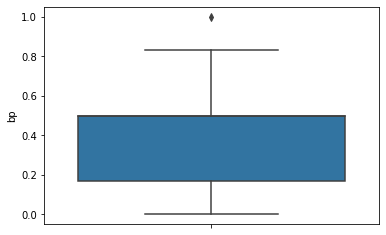

In [ ]:
import seaborn as sns
sns.boxplot(y=df['bp'])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,classification
0,-1775.961079,-1.272252,1.0
1,3623.870227,-49.353125,1.0
2,-3974.763907,251.150842,1.0
3,2524.252694,29.701895,1.0
4,724.442895,74.544131,1.0


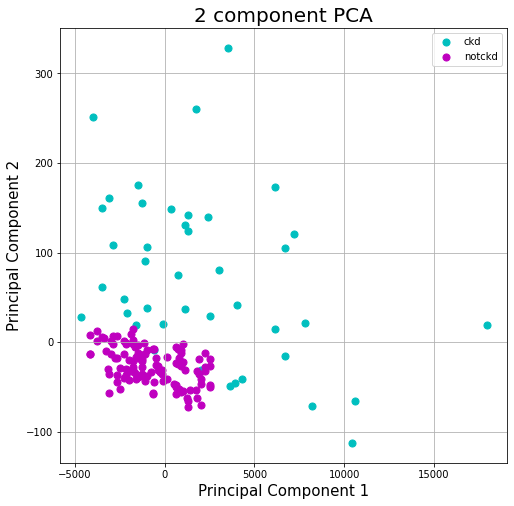

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0]
colors = ['c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['classification'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["ckd", "notckd"])
ax.grid()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
X_2d = tsne.fit_transform(X)

In [ ]:
print(X_2d)

[[ 8.54073811e+00 -6.03646326e+00]
 [-9.22107983e+00  2.90218687e+00]
 [ 1.54793978e+01 -8.96490002e+00]
 [-8.14902020e+00  2.16665888e+00]
 [-3.05276275e+00 -2.90808171e-01]
 [ 7.12618208e+00 -5.77721596e+00]
 [-4.08948374e+00  1.03911805e+00]
 [-1.06585598e+01  4.94816732e+00]
 [ 5.65127659e+00 -4.07893229e+00]
 [-1.03071690e+01  4.01543427e+00]
 [ 1.00798969e+01 -6.99717712e+00]
 [ 1.11285915e+01 -7.41566896e+00]
 [ 1.59061117e+01 -9.38478756e+00]
 [-4.83910418e+00  1.23126030e+00]
 [-9.42101955e+00  3.07264686e+00]
 [ 1.31756744e+01 -8.79678154e+00]
 [ 6.76941347e+00 -4.72129011e+00]
 [-1.04255323e+01  4.19145918e+00]
 [ 1.45865374e+01 -9.23592567e+00]
 [-1.05318871e+01  4.45828104e+00]
 [ 5.97126603e-01 -1.88022292e+00]
 [-7.22912121e+00  1.77384067e+00]
 [-1.04234056e+01  4.19134188e+00]
 [-1.03077221e+01  4.01493406e+00]
 [ 2.23815680e+00 -2.68894076e+00]
 [-7.77973557e+00  2.63237882e+00]
 [-9.56170750e+00  3.20901012e+00]
 [-9.37401867e+00  3.03895974e+00]
 [-1.06623096e+01  4

In [ ]:
new_df = pd.DataFrame(data = X_2d
             , columns = ['feature 1', 'feature 2'])
tsne_df = pd.concat([new_df, y], axis = 1)
tsne_df.head()

,feature 1,feature 2,classification
0,8.540738,-6.036463,1.0
1,-9.221080,2.902187,1.0
2,15.479398,-8.964900,1.0
3,-8.149020,2.166659,1.0
4,-3.052763,-0.290808,1.0


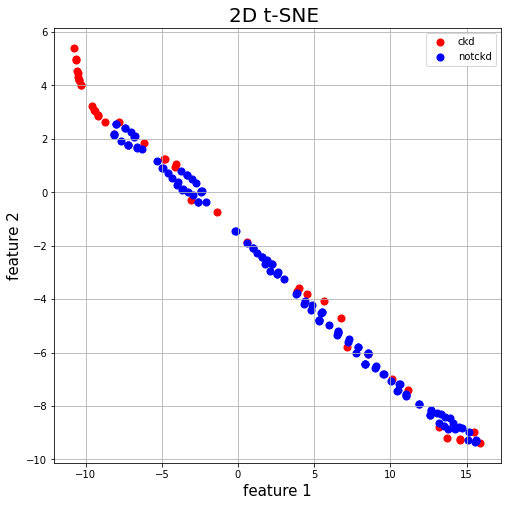

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)
targets = [1.0,2.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['classification'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'feature 1']
               , tsne_df.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(["ckd", "notckd"])
ax.grid()

In [ ]:
data = pd.concat([df, y], axis = 1)

In [ ]:
data.head()
data.shape

(158, 26)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:24]  
y = data.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Health','Score']  
print(featureScores.nlargest(10,'Score')) 

   Health      Score
18    htn  90.930233
3      al  84.244186
6      pc  77.558140
19     dm  74.883721
22     pe  53.488372
5     rbc  48.139535
23    ane  42.790698
7     pcc  37.441860
8      ba  32.093023
20    cad  29.418605


[0.00075538 0.0080549  0.07924879 0.18198242 0.00604432 0.0441866
 0.09748696 0.00688709 0.00805531 0.0076619  0.00883036 0.03832186
 0.00153805 0.00031434 0.05519878 0.07776917 0.00752451 0.03678639
 0.17970188 0.06931986 0.00559913 0.02461173 0.04141907 0.01270121]


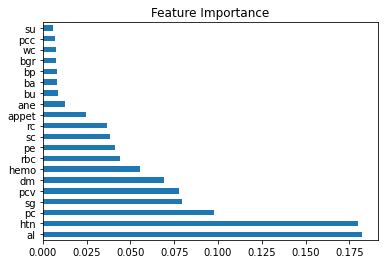

In [ ]:
import pandas as pd
import numpy as np

X = df.iloc[:,0:24]  
y = df.iloc[:,-1]    

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

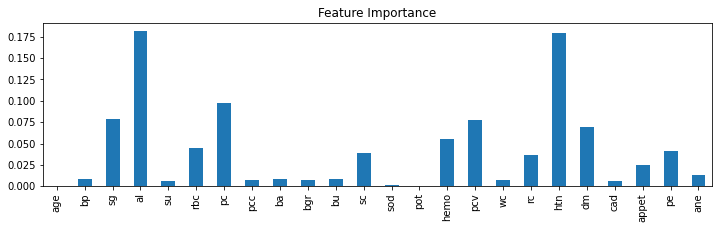

In [ ]:
plt.figure(figsize=(12,3))
features = X.columns.values.tolist()
importance = model.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

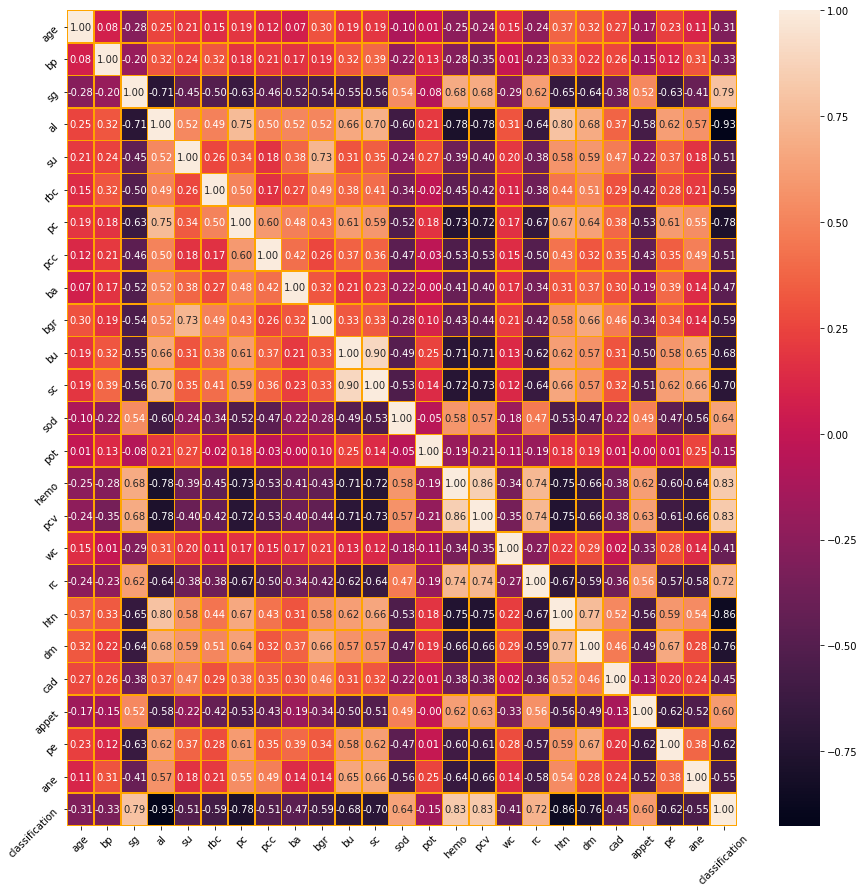

In [ ]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# **ANN (Sequential Model Keras)**

In [ ]:
import glob
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
import keras as k

In [ ]:
df = pd.read_csv(path)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Create a list of column names to keep 
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'htn', 'classification']

# Drop the columns that are not in the above parameters
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis = 1 )

# Drop the rows with na/missing values 
df = df.dropna(axis=0)

In [ ]:
# Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

In [ ]:
# Print the first 5 rows of the new cleaned data set
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [ ]:
# Split the data into independent/feature (X) data set and dependent/target (Y) data set
X = df.drop(['classification'], axis=1)
y = df['classification']

In [ ]:
# Feature Scaling 
# Min-Max Scaler Method scales the data set to that all the input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
# Split the data into 80% training and 20% testing & shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
# Build the model
model = Sequential()
model.add( Dense(256,input_dim= len(X.columns),kernel_initializer= k.initializers.random_normal(seed=13),activation='relu') )
model.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
# Compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model 
history = model.fit(X_train, y_train, epochs=2000, batch_size= X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.6987
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.8210
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.8603
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.8734
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.8865
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.8908
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.8865
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.8865
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.8821
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.8821
Epoch 11/2000
1/1 [

In [ ]:
# Save the model 
model.save('ckd.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ckd.model/assets


Text(0.5, 0, 'Epoch')

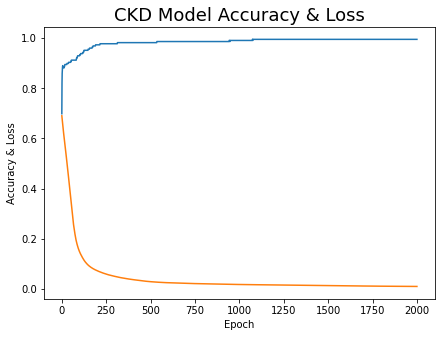

In [ ]:
# Visualize the models loss and accuracy
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('CKD Model Accuracy & Loss',fontsize=18)
plt.ylabel('Accuracy & Loss')
plt.xlabel('Epoch')

In [ ]:
# Get the shape of the test and training data
print('Shape of training data:',X_train.shape)
print('Shape of test data:',X_test.shape)

Shape of training data: (229, 6)
Shape of test data: (58, 6)


In [ ]:
# Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

print('Original : {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

Original : 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0
Predicted : 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0


In [ ]:
# Get the model's accuracy, precision, recall, and the f1-score
print('Chronic Kidney Disease Prediction Test Results')
print()
print(classification_report(y_test, pred))

Chronic Kidney Disease Prediction Test Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



# **Logistic Regression dan K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats

In [ ]:
df = pd.read_csv(path)
data = df
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


**Data** **Mapping**

In [ ]:
#memperbaiki nilai unique
data.wc=data.wc.replace("\t6200",6200)
data.wc=data.wc.replace("\t8400",8400) 
data['cad'] = data['cad'].replace(to_replace = '\tno', value='no')
data['classification'] = data['classification'].replace(to_replace = 'ckd\t', value = 'ckd')
print(data.loc[11,["wc"]])
print(data.loc[20,["wc"]])

data['classification'] = data['classification'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

wc    4500
Name: 11, dtype: object
wc    9200
Name: 20, dtype: object


In [ ]:
data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [ ]:
data.shape[0], data.dropna().shape[0]

(400, 158)

In [ ]:
data.dropna(inplace=True)
data.drop("id",axis=1,inplace=True) 
data.shape

(158, 25)

**Model** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
X = data.iloc[:,:-1]
y = data['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [ ]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [ ]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.251093,-0.185339,0.004875,0.375291,0.009297,0.020219,0.112182,0.002367,0.00747,0.225392,0.376656,0.147405,-0.133033,0.07432,-0.272174,-0.771251,0.000677,-0.112044,0.112207,0.111053,0.001369,-0.003417,0.009191,0.002206


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


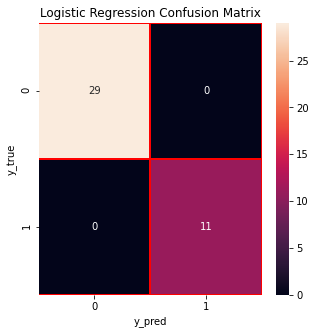

In [ ]:
y_pred=logreg.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

**KNN**

In [ ]:
df["classification"].value_counts()

0    115
1     43
Name: classification, dtype: int64

In [ ]:
balanced_df = pd.concat([df[df["classification"] == 0], df[df["classification"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)

In [ ]:
balanced_df["classification"].value_counts()

1    115
0    115
Name: classification, dtype: int64

In [ ]:
X = balanced_df.drop("classification", axis=1)
y = balanced_df["classification"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}
gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

1.0

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 26
False Pos: 0
False Neg: 0
True Pos: 32


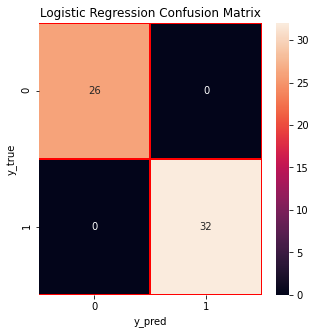

In [ ]:
y_pred=logreg.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
#prediksi model
pred_svm = model_svm.predict(x_test)
#evaluasi dengan data text
accuracy = (pred_svm == y_test).sum()/len(y_test)
accuracy

# **Naive Bayes**

Navie Bayes accuracy = 100.0


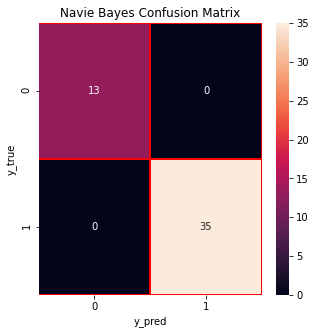

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[] 

nb=GaussianNB()

y=df["classification"].values
x_data=df.drop(["classification"],axis=1)

#Normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

#Training
nb.fit(x_train,y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Navie-Bayes")
print("Navie Bayes accuracy =",nb.score(x_test,y_test)*100)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Navie Bayes Confusion Matrix")
plt.show()

# **Random** **Forest**

Random Forest accuracy = 1.0


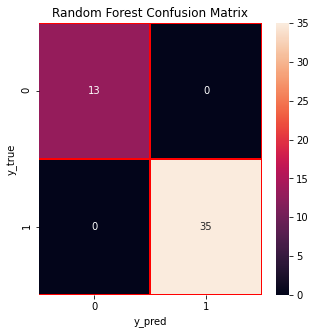

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

# **Support Vector Machine dengan SVC**

svm test accuracy = 100.0


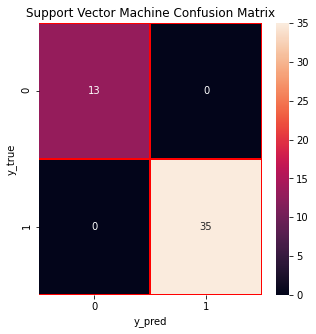

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

# **Decision Tree**

Decision Tree accuracy: 100.0


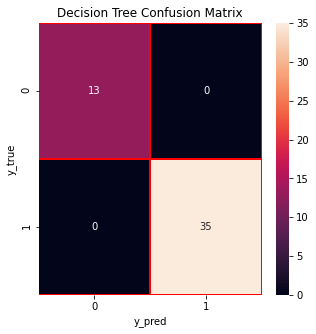

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# **Logistic Regression**

test accuracy 0.9583333333333334


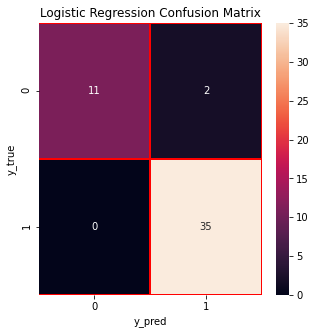

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()